In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


# Set font size and style in matplotlib
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

# Error bar kwargs for prism style plots
errorbar_kwargs = {'capsize': 5, 'capthick': 2, 'elinewidth': 2, 'zorder': 10}

# Spine properties
spine_properties = {'color': 'black', 'linewidth': 2}

# Color palate with basal, default, and perturbation colors
colors_basal = ['whitesmoke','lightsteelblue', 'steelblue']

# Color palate default, perturbation
colors_default = ['lightsteelblue', 'steelblue']

# Colors to highlight metabolites
# Glucose, lactate, 3HB, Fatty acids
colors_met = ['firebrick', 'lightcoral', 'wheat', 'gold']

In [2]:
df = pd.read_csv('./data/co2.csv')
df.columns = df.columns.str.upper()

# Get cage to tracer meta data
metda_data = df.groupby(['CAGE', 'DAY','TRACER', 'TRACER_UMOL_MIN']).size().reset_index(name='COUNTS')  

# Curate data 
# Change Day entries from 2/3 to non-perturbative / perturbative
df['DAY'] = df['DAY'].apply(lambda x: 'non-perturbative' if x == 2 else 'perturbative')
df.head()

mapping = {'3hb': '3-hydroxybutyrate', 'glucose': 'glucose', 'lactate': 'lactate',}
df['TRACER'] = df['TRACER'].replace(mapping)



In [3]:
df

,DAY,TIME,VCO2,SI13C,TRACER,CAGE,ENRICH,TRACER_UMOL_MIN,CO2_FLUX,RECOVERY
0,non-perturbative,-352,1.249430,-11.785750,glucose,1,-0.000107,2.04120,-0.005979,-0.003255
1,non-perturbative,-356,1.696254,-10.642560,lactate,2,-0.000095,1.56240,-0.007166,-0.005096
2,non-perturbative,-362,1.689503,-8.962937,3-hydroxybutyrate,3,-0.000076,0.40160,-0.005745,-0.015896
3,non-perturbative,-367,1.515335,-5.852248,glucose,4,-0.000042,2.17560,-0.002840,-0.001451
4,non-perturbative,-373,2.085561,-8.653533,lactate,5,-0.000073,1.81629,-0.006776,-0.004145
...,...,...,...,...,...,...,...,...,...,...
24571,perturbative,213,0.015129,4639.813000,lactate,10,0.048509,9.98325,0.032763,0.003646
24572,perturbative,207,0.026478,1441.984000,3-hydroxybutyrate,11,0.015618,11.61600,0.018462,0.001766
24573,perturbative,202,0.019482,369.727100,glucose,12,0.004069,27.13500,0.003539,0.000145
24574,perturbative,188,-0.146468,-1222.383000,lactate,13,-0.013595,9.82665,0.088896,0.010052


In [4]:
#data_filtered = df[(df['TIME'] >= 10) & (df['TIME'] <= 150) ]
#sns.lineplot(data=data_filtered, x='TIME', y='CO2_FLUX', hue='TRACER', style='DAY',palette=colors_met,)

In [5]:
#sns.lineplot(data=data_filtered, x='TIME', y='VCO2', hue='TRACER', style='DAY',palette=colors_met,)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, )

In [6]:
# Load serum labeling data 
df2 = pd.read_csv('./data/perturbative_experiments_labeling_combined_240804.csv')
df2.columns = df2.columns.str.upper()
df2 = df2.melt(id_vars=['COMPOUND', 'C_LABEL'])

# Fetch data from variable column
# Day1_Cage2_T0 -> Day = 1 , Cage = 2, Time = 0
df2['DAY'] = df2['variable'].apply(lambda x: int(x.split('_')[0][3:])) + 1
df2['CAGE'] = df2['variable'].apply(lambda x: int(x.split('_')[1][4:]))
df2['TIME'] = df2['variable'].apply(lambda x: int(x.split('_')[2][1:]))

# Integate metadata based on cage and day
df2 = pd.merge(df2, metda_data, on=['CAGE', 'DAY'])

df2['DAY'] = df2['DAY'].apply(lambda x: 'non-perturbative' if x == 2 else 'perturbative')

df2.head()

# Make tracer and compound names consistent
df2['COMPOUND'] = df2['COMPOUND'].apply(lambda x: x.lower())
mapping = {'3hb': '3-hydroxybutyrate_4', 'glucose': 'glucose_6', 'lactate': 'lactate_3',}
df2['TRACER'] = df2['TRACER'].replace(mapping)

df2['COMPOUND_LABEL'] = df2['COMPOUND']+ '_' + df2['C_LABEL'].astype(str)

In [7]:
# data_filtered = df2[(df2['TIME'] >= 0) & (df2['TIME'] <= 200) & (df2['COMPOUND_LABEL'] == df2['TRACER'])]

# sns.lineplot(data=data_filtered, x='TIME', y='value', hue='COMPOUND_LABEL', style='DAY',)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, )

In [8]:
TIME = [120, 130]

In [9]:
# Load serum metabolomics data
# df3 = pd.read_csv('./data/perturbative_experiments_pool_size_combined_240804.csv')
df3 = pd.read_csv('./data/202312_UPenn_Perturbative_Infusions_pool_sizes.csv')
df3.columns = df3.columns.str.upper()

# Substract blank values from data
blank = df3['Blank_before_plasma_2'.upper()]
df3 = df3.drop(columns=['Blank_before_plasma_2'.upper()])
df3.iloc[:,1:] = df3.iloc[:,1:].sub(blank, axis=0)

df3 = df3.melt(id_vars=['COMPOUND'])
# Fetch data from variable column
# Day1_Cage2_T0 -> Day = 1 , Cage = 2, Time = 0
df3['DAY'] = df3['variable'].apply(lambda x: int(x.split('_')[0][3:])) + 1
df3['CAGE'] = df3['variable'].apply(lambda x: int(x.split('_')[1][4:]))
df3['TIME'] = df3['variable'].apply(lambda x: int(x.split('_')[2][1:]))

# Integate metadata based on cage and day
df3 = pd.merge(df3, metda_data, on=['CAGE', 'DAY'])

print(df3.head())

df3['DAY'] = df3['DAY'].apply(lambda x: 'non-perturbative' if x == 2 else 'perturbative')



            COMPOUND       variable         value  DAY  CAGE  TIME   TRACER  \
0  3-hydroxybutyrate  DAY1_CAGE1_T0  1.323345e+07    2     1     0  glucose   
1              C16:0  DAY1_CAGE1_T0  3.187138e+09    2     1     0  glucose   
2              C18:1  DAY1_CAGE1_T0  2.760875e+09    2     1     0  glucose   
3             C18:2   DAY1_CAGE1_T0  2.653140e+09    2     1     0  glucose   
4            Glucose  DAY1_CAGE1_T0  3.544277e+07    2     1     0  glucose   

   TRACER_UMOL_MIN  COUNTS  
0           2.0412    1449  
1           2.0412    1449  
2           2.0412    1449  
3           2.0412    1449  
4           2.0412    1449  


In [10]:
# Normalize by mean repsective non-perturbative day 1 values 
# For each compound, calculate mean of non-perturbative day 1 values
df3_non_perturbative_day1 = df3[(df3['DAY'] == 'non-perturbative') & (TIME[0] <= df3['TIME']) & (df3['TIME'] <= TIME[1])]
df3_non_perturbative_day1 = df3_non_perturbative_day1.groupby('COMPOUND')['value'].mean().reset_index(name='MEAN_NON_PERTURBATIVE_DAY1')

# Merge mean values with original data
df3 = pd.merge(df3, df3_non_perturbative_day1, on='COMPOUND')

# Normalize values
df3['value_normalized'] = df3['value'] / df3['MEAN_NON_PERTURBATIVE_DAY1']

# Make tracer and compound names consistent
df3['COMPOUND'] = df3['COMPOUND'].apply(lambda x: x.lower())
mapping = {'3hb': '3-hydroxybutyrate', 'glucose': 'glucose', 'lactate': 'lactate',}
df3['TRACER'] = df3['TRACER'].replace(mapping)

In [11]:
# order of compounds
order = ['glucose', 'lactate', '3-hydroxybutyrate',]
hue_order = ['non-perturbative', 'perturbative']

# Pairs to test for statistical significance
pairs = [ (('glucose','non-perturbative') , ('glucose','perturbative')), 
            (('lactate','non-perturbative') , ('lactate','perturbative')),
            (('3-hydroxybutyrate','non-perturbative') , ('3-hydroxybutyrate','perturbative'))]
  

colors = ['darkgrey', 'white', ]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lactate_non-perturbative vs. lactate_perturbative: Welch's t-test independent samples, P_val:2.081e-04 t=-1.054e+01
glucose_non-perturbative vs. glucose_perturbative: Welch's t-test independent samples, P_val:2.373e-02 t=-3.382e+00
3-hydroxybutyrate_non-perturbative vs. 3-hydroxybutyrate_perturbative: Welch's t-test independent samples, P_val:6.850e-03 t=-1.075e+01


/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/1318904970.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_filtered = data_filtered.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()


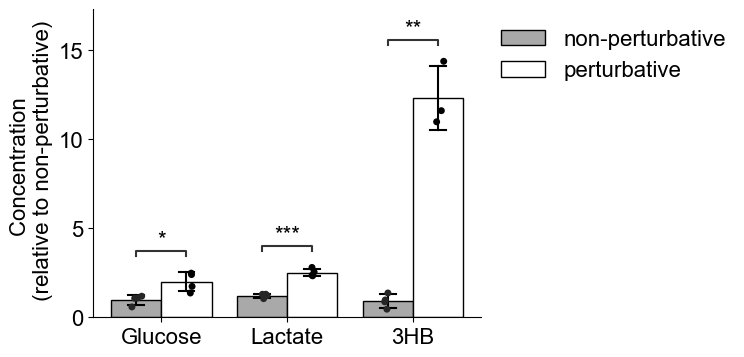

In [12]:
# Figure 1 Perturbative vs non-perturbative concentrations, rate of appearnace and reate of disappearance

# a) Concentrations
f, ax = plt.subplots(1, 1, figsize=(5, 4))
data_filtered = df3[(df3['TRACER'] == df3['COMPOUND']) & (df3['TIME'] >= TIME[0]) & (df3['TIME'] <= TIME[1])]
data_filtered = data_filtered.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()

sns.barplot(data=data_filtered, x='COMPOUND', y='value_normalized', hue='DAY', palette=colors,
            errorbar='sd',capsize=0.25,  edgecolor='black', err_kws={'color': 'black','linewidth': 1.5},
            order=order, hue_order=hue_order)
            
sns.stripplot(data=data_filtered, x='COMPOUND', y='value_normalized', hue='DAY', dodge=True, size=5, 
              alpha=1.0, palette='dark:black', legend=False, order=order)
sns.despine()

plt.ylabel('Concentration \n (relative to non-perturbative)')
plt.xlabel('')

# Rename x-axis labels
xticks = ['Glucose', 'Lactate', '3HB']
plt.xticks(range(len(xticks)), xticks, rotation=0, ha='center')

# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
       

annotator = Annotator(ax, pairs, data=data_filtered,
                      x='COMPOUND', y='value_normalized',
                      hue='DAY' , order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/concentration.svg',bbox_inches='tight')

In [13]:
data_filtered = df3[ (df3['TIME'] >= TIME[0]) & (df3['TIME'] <= TIME[1])]
data_filtered.to_csv('./output/concentration_data.csv', index=False)

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/670726667.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_filtered = data_filtered.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lactate_non-perturbative vs. lactate_perturbative: Welch's t-test independent samples, P_val:4.545e-02 t=3.214e+00
glucose_non-perturbative vs. glucose_perturbative: Welch's t-test independent samples, P_val:2.650e-02 t=2.943e+00
3-hydroxybutyrate_non-perturbative vs. 3-hydroxybutyrate_perturbative: Welch's t-test independent samples, P_val:4.481e-01 t=9.250e-01


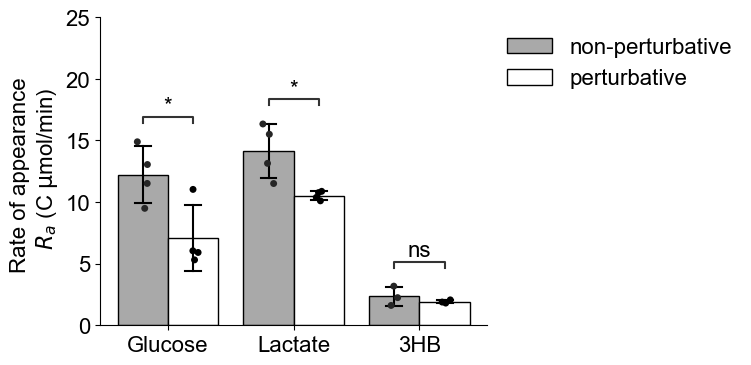

In [14]:
# b) Rate of appearance
f, ax = plt.subplots(1, 1, figsize=(5, 4))
data_filtered = df2[(df2['TRACER'] == df2['COMPOUND_LABEL']) & (df2['TIME'] >= TIME[0]) & (df2['TIME'] <= TIME[1])]
data_filtered = data_filtered.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()


# Copute rate of appearance usin the enrichment 
data_filtered['RA'] = data_filtered['TRACER_UMOL_MIN'] * (1 - data_filtered['value'])/ data_filtered['value']

sns.barplot(data=data_filtered, x='COMPOUND', y='RA', hue='DAY', palette=colors,
            errorbar='sd',capsize=0.25,  edgecolor='black', err_kws={'color': 'black','linewidth': 1.5}, order=order
            , hue_order=hue_order)

sns.stripplot(data=data_filtered, x='COMPOUND', y='RA', hue='DAY', dodge=True, size=5,
                alpha=1.0, palette='dark:black', legend=False, order=order) 
sns.despine()

plt.ylabel('Rate of appearance \n $R_a$ (C $\mathrm{\mu}$mol/min)')   
plt.xlabel('')
# Rename x-axis labels
xticks = ['Glucose', 'Lactate', '3HB']
plt.xticks(range(len(xticks)), xticks, rotation=0, ha='center')

plt.ylim(0, 25)

# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)


annotator = Annotator(ax, pairs, data=data_filtered,
                        x='COMPOUND', y='RA',
                        hue='DAY' , order=order, hue_order=hue_order)

annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/rate_of_appearance.svg',bbox_inches='tight')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lactate_non-perturbative vs. lactate_perturbative: Welch's t-test independent samples, P_val:2.186e-02 t=-4.246e+00
glucose_non-perturbative vs. glucose_perturbative: Welch's t-test independent samples, P_val:8.674e-04 t=-8.450e+00
3-hydroxybutyrate_non-perturbative vs. 3-hydroxybutyrate_perturbative: Welch's t-test independent samples, P_val:6.460e-05 t=-1.744e+01


/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/3866017445.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_filtered = data_filtered.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()


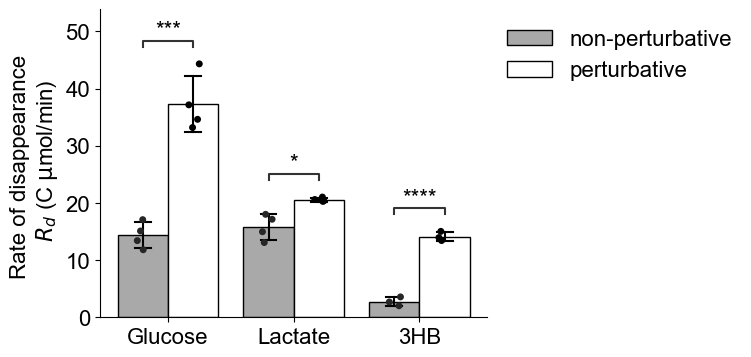

In [15]:
# c) Rate of disappearance

f, ax = plt.subplots(1, 1, figsize=(5, 4))
data_filtered = df2[(df2['TRACER'] == df2['COMPOUND_LABEL']) & (df2['TIME'] >= TIME[0]) & (df2['TIME'] <= TIME[1])]
data_filtered = data_filtered.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()

# Copute rate of appearance usin the enrichment
data_filtered['RA'] = (data_filtered['TRACER_UMOL_MIN'] * (1 - data_filtered['value'])/ data_filtered['value'] )
data_filtered['RD'] = data_filtered['TRACER_UMOL_MIN'] + data_filtered['RA'] 

sns.barplot(data=data_filtered, x='COMPOUND', y='RD', hue='DAY', palette=colors,
            errorbar='sd',capsize=0.25,  edgecolor='black', err_kws={'color': 'black','linewidth': 1.5}, order=order)   

sns.stripplot(data=data_filtered, x='COMPOUND', y='RD', hue='DAY', dodge=True, size=5,
                alpha=1.0, palette='dark:black', legend=False, order=order) 

sns.despine()

plt.ylabel('Rate of disappearance \n $R_d$ (C $\mathrm{\mu}$mol/min)')   
plt.xlabel('')
# Rename x-axis labels
xticks = ['Glucose', 'Lactate', '3HB']
plt.xticks(range(len(xticks)), xticks, rotation=0, ha='center')

plt.ylim(0, 50)

# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

annotator = Annotator(ax, pairs, data=data_filtered,
                        x='COMPOUND', y='RD',
                        hue='DAY' , order=order, hue_order=hue_order)

annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/rate_of_disappearance.svg',bbox_inches='tight')


In [16]:
data_filtered

,COMPOUND,TRACER,DAY,CAGE,C_LABEL,value,TIME,TRACER_UMOL_MIN,COUNTS,RA,RD
0,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,3,4.0,0.199621,120.0,0.40160,1449.0,1.610217,2.011817
1,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,6,4.0,0.161503,120.0,0.43200,1449.0,2.242877,2.674877
2,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,11,4.0,0.108681,120.0,0.38720,1449.0,3.175529,3.562729
3,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,3,4.0,0.864688,120.0,12.04800,599.0,1.885347,13.933347
4,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,6,4.0,0.862748,120.0,12.96000,599.0,2.061773,15.021773
5,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,11,4.0,0.865692,120.0,11.61600,599.0,1.802172,13.418172
6,glucose,glucose_6,non-perturbative,1,6.0,0.135270,120.0,2.04120,1449.0,13.048581,15.089781
7,glucose,glucose_6,non-perturbative,4,6.0,0.127457,120.0,2.17560,1449.0,14.893671,17.069271
8,glucose,glucose_6,non-perturbative,9,6.0,0.196297,120.0,2.31840,1449.0,9.492295,11.810695
9,glucose,glucose_6,non-perturbative,12,6.0,0.141004,120.0,1.89000,1449.0,11.513845,13.403845


In [17]:
data_filtered

,COMPOUND,TRACER,DAY,CAGE,C_LABEL,value,TIME,TRACER_UMOL_MIN,COUNTS,RA,RD
0,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,3,4.0,0.199621,120.0,0.40160,1449.0,1.610217,2.011817
1,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,6,4.0,0.161503,120.0,0.43200,1449.0,2.242877,2.674877
2,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,11,4.0,0.108681,120.0,0.38720,1449.0,3.175529,3.562729
3,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,3,4.0,0.864688,120.0,12.04800,599.0,1.885347,13.933347
4,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,6,4.0,0.862748,120.0,12.96000,599.0,2.061773,15.021773
5,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,11,4.0,0.865692,120.0,11.61600,599.0,1.802172,13.418172
6,glucose,glucose_6,non-perturbative,1,6.0,0.135270,120.0,2.04120,1449.0,13.048581,15.089781
7,glucose,glucose_6,non-perturbative,4,6.0,0.127457,120.0,2.17560,1449.0,14.893671,17.069271
8,glucose,glucose_6,non-perturbative,9,6.0,0.196297,120.0,2.31840,1449.0,9.492295,11.810695
9,glucose,glucose_6,non-perturbative,12,6.0,0.141004,120.0,1.89000,1449.0,11.513845,13.403845


In [18]:
data_filtered

,COMPOUND,TRACER,DAY,CAGE,C_LABEL,value,TIME,TRACER_UMOL_MIN,COUNTS,RA,RD
0,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,3,4.0,0.199621,120.0,0.40160,1449.0,1.610217,2.011817
1,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,6,4.0,0.161503,120.0,0.43200,1449.0,2.242877,2.674877
2,3-hydroxybutyrate,3-hydroxybutyrate_4,non-perturbative,11,4.0,0.108681,120.0,0.38720,1449.0,3.175529,3.562729
3,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,3,4.0,0.864688,120.0,12.04800,599.0,1.885347,13.933347
4,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,6,4.0,0.862748,120.0,12.96000,599.0,2.061773,15.021773
5,3-hydroxybutyrate,3-hydroxybutyrate_4,perturbative,11,4.0,0.865692,120.0,11.61600,599.0,1.802172,13.418172
6,glucose,glucose_6,non-perturbative,1,6.0,0.135270,120.0,2.04120,1449.0,13.048581,15.089781
7,glucose,glucose_6,non-perturbative,4,6.0,0.127457,120.0,2.17560,1449.0,14.893671,17.069271
8,glucose,glucose_6,non-perturbative,9,6.0,0.196297,120.0,2.31840,1449.0,9.492295,11.810695
9,glucose,glucose_6,non-perturbative,12,6.0,0.141004,120.0,1.89000,1449.0,11.513845,13.403845


In [19]:
# Compute the delta between non-perturbative and perturbative for C13-CO2 Flux and Rd 
data_filtered_1 = df[(df['TIME'] >= TIME[0]) & (df['TIME'] <= TIME[1])]
data_filtered_1 = data_filtered_1.groupby(['TRACER', 'DAY','CAGE'])[['CO2_FLUX','VCO2']].mean().reset_index()


# Compute the delta between non-perturbative and perturbative for RD
data_filtered_2 = df2[(df2['TIME'] >= TIME[0]) & (df2['TIME'] <= TIME[1]) & (df2['TRACER'] == df2['COMPOUND_LABEL'])]
data_filtered_2 = data_filtered_2.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()

# Join on cage and day
data_filtered = pd.merge(data_filtered_1, data_filtered_2, on=['DAY','CAGE'], how='left')

# Compute Rd
data_filtered['RA'] = data_filtered['TRACER_UMOL_MIN'] * (1 - data_filtered['value'])/ data_filtered['value']
data_filtered['RD'] = data_filtered['TRACER_UMOL_MIN'] + data_filtered['RA']

# Compute an estimate of the oxidation flux 
data_filtered['CO2_FLUX_NORM'] = data_filtered['CO2_FLUX'] / data_filtered['value']


data_filtered['TRACER'] = data_filtered['TRACER_x']

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/3514629277.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_filtered_2 = data_filtered_2.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lactate_non-perturbative vs. lactate_perturbative: Welch's t-test independent samples, P_val:5.202e-03 t=-7.326e+00
glucose_non-perturbative vs. glucose_perturbative: Welch's t-test independent samples, P_val:4.411e-06 t=-4.544e+01
3-hydroxybutyrate_non-perturbative vs. 3-hydroxybutyrate_perturbative: Welch's t-test independent samples, P_val:8.880e-04 t=-1.343e+01


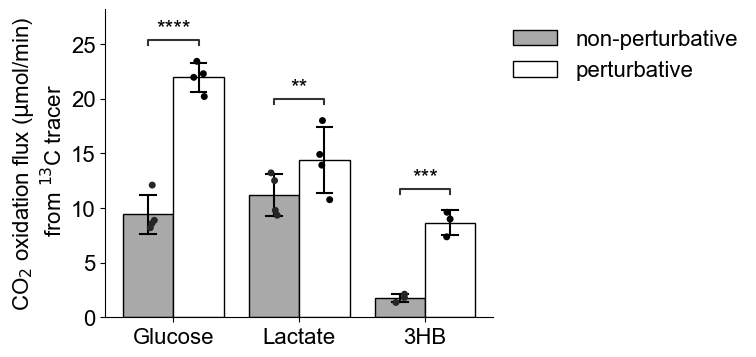

In [20]:
# d) Rate of oxidation CO2_FLUX
f, ax = plt.subplots(1, 1, figsize=(5, 4))

# data_filtered = df[(df['TIME'] >= TIME[0]) & (df['TIME'] <= TIME[1])]
# # Take mean across time for each tracer
# data_filtered = data_filtered.groupby(['TRACER', 'DAY','CAGE'])[['CO2_FLUX','VCO2','value']].mean().reset_index()

# # Estimate an oxidation flux by normalizing CO2_FLUX by labelin of the tracer (values)
# data_filtered['OX_FLUX'] = data_filtered['CO2_FLUX'] / data_filtered['value']

sns.barplot(data=data_filtered, x='TRACER', y='CO2_FLUX_NORM', hue='DAY', palette=colors, errorbar='sd',capsize=0.25, 
             edgecolor='black', err_kws={'color': 'black','linewidth': 1.5}, order=order)
sns.stripplot(data=data_filtered, x='TRACER', y='CO2_FLUX_NORM', hue='DAY', dodge=True, size=5,
               alpha=1.0, palette='dark:black', legend=False, order=order)

sns.despine()           
plt.ylabel('CO$_2$ oxidation flux ($\mathrm{\mu}$mol/min) \n from $^{13}$C tracer')
plt.xlabel('')
# Rename x-axis labels
xticks = ['Glucose', 'Lactate', '3HB']
plt.xticks(range(len(xticks)), xticks, rotation=0, ha='center')
# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

annotator = Annotator(ax, pairs, data=data_filtered,
                        x='TRACER', y='CO2_FLUX',
                        hue='DAY' , order=order, hue_order=hue_order)

annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/C13_CO2.svg', bbox_inches='tight')


In [21]:
# Compute the delta between non-perturbative and perturbative for C13-CO2 Flux and Rd 
data_filtered_1 = df[(df['TIME'] >= TIME[0]) & (df['TIME'] <= TIME[1])]
data_filtered_1 = data_filtered_1.groupby(['TRACER', 'DAY','CAGE'])[['CO2_FLUX','VCO2']].mean().reset_index()


# Compute the delta between non-perturbative and perturbative for RD
data_filtered_2 = df2[(df2['TIME'] >= TIME[0]) & (df2['TIME'] <= TIME[1]) & (df2['TRACER'] == df2['COMPOUND_LABEL'])]
data_filtered_2 = data_filtered_2.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()

# Join on cage and day
data_filtered = pd.merge(data_filtered_1, data_filtered_2, on=['DAY','CAGE'])

# Compute Rd
data_filtered['RA'] = data_filtered['TRACER_UMOL_MIN'] * (1 - data_filtered['value'])/ data_filtered['value']
data_filtered['RD'] = data_filtered['TRACER_UMOL_MIN'] + data_filtered['RA']

# Compute an estimate of the oxidation flux 
data_filtered['CO2_FLUX_NORM'] = data_filtered['CO2_FLUX'] / data_filtered['value']

data_filtered['TRACER'] = data_filtered['TRACER_x']

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/1976914786.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_filtered_2 = data_filtered_2.groupby(['COMPOUND','TRACER', 'DAY','CAGE']).mean().reset_index()


/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/2413189111.py:16: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=data_filtered, x='RD', y='CO2_FLUX_NORM', hue='TRACER_x', palette=colors_met, s=100, hue_order=order)


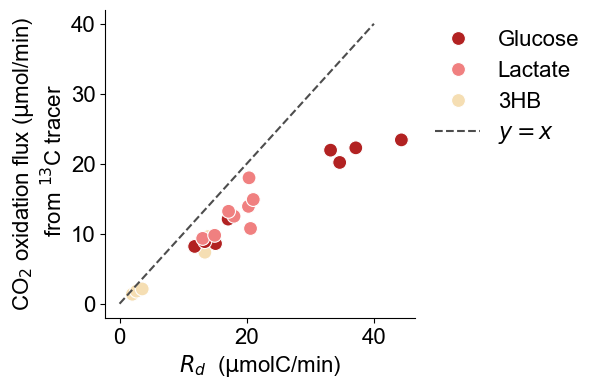

In [22]:
# Compute delta of RD and CO2 flux for each cage between non-perturbative and perturbative
data_filtered['DELTA_RD'] = data_filtered.groupby(['CAGE'])['RD'].diff()
data_filtered['DELTA_RA'] = data_filtered.groupby(['CAGE'])['RA'].diff()

data_filtered['DELTA_RD_norm'] = data_filtered['DELTA_RD']

data_filtered['DELTA_CO2_FLUX'] = data_filtered.groupby(['CAGE'])['CO2_FLUX_NORM'].diff()

# Rename labels glucose, lactate, 3HB
raname_mapping = {'3-hydroxybutyrate': '3HB', 'glucose': 'Glucose', 'lactate': 'Lactate',}
data_filtered['TRACER_x'] = data_filtered['TRACER_x'].replace(raname_mapping)
order = ['Glucose', 'Lactate', '3HB']

# Scatter plot of delta RD and delta CO2 flux
f, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(data=data_filtered, x='RD', y='CO2_FLUX_NORM', hue='TRACER_x', palette=colors_met, s=100, hue_order=order)
sns.despine()
plt.plot([0, 40], [0, 40], ls="--", c=".3", label='$y=x$')
plt.xlabel('$R_d$  ($\mathrm{\mu}$molC/min)')
plt.ylabel('CO$_2$ oxidation flux ($\mathrm{\mu}$mol/min) \n from $^{13}$C tracer')


plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.savefig('./output/delta_RD_vs_delta_CO2_flux.svg',  bbox_inches='tight')

# Save the data 
data_filtered.to_csv('./output/fcirc_data.csv', index=False) 

In [23]:
# Load the data from the exel file 
import pandas as pd 
met_cage_data = pd.read_csv('./data/2023-12-04_won3dayinfusionpromethion (4)_m_calr_SICO2MACROFeb2025.csv',)

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/3139997484.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  met_cage_data = pd.read_csv('./data/2023-12-04_won3dayinfusionpromethion (4)_m_calr_SICO2MACROFeb2025.csv',)


In [24]:
met_cage_data['Date_Time'] = pd.to_datetime(met_cage_data['Date_Time_1'])

In [25]:
# Timeline
# Day 1 on 12/5/2023: Acclimation with connected lines, no infusion
# Day 2 on 12/6/2023: Non-perturbative infusion from 1-3:30 pm with staggered start/end times
# Day 3 on 12/7/2023: Perturbative infusion from 1-3:30 pm with staggered start/end times
# Infusate
# Glucose: Cages 1, 4, 10, 12
# Lactate: Cages 2, 5, 9, 13
# 3HB: Cages 3, 6, 11, 14


In [26]:
met_cage_data.Date_Time.dt.date.unique()

array([datetime.date(2023, 12, 4), datetime.date(2023, 12, 5),
       datetime.date(2023, 12, 6), datetime.date(2023, 12, 7), NaT],
      dtype=object)

In [27]:
# Get date from datetime6
met_cage_data['Date'] = met_cage_data['Date_Time'].dt.date.astype(str)
met_cage_data['Time'] = met_cage_data['Date_Time'].dt.time

# Map date to non-perturbative and perturbative
mapping = {'2023-12-06': 'non-perturbative', '2023-12-07': 'perturbative'}

met_cage_data['type'] = met_cage_data['Date'].map(mapping)
# Drop columns with type = NaN
met_cage_data = met_cage_data.dropna(subset=['type'])

# filter data from 1-3:30 pm -> min 1h 
import datetime 
start_time = datetime.time(13, 0, 0)
end_time = datetime.time(15, 0, 0)

flitered_ix = met_cage_data['Date_Time'].apply(lambda x: start_time <= x.time() <= end_time)
met_cage_data = met_cage_data[flitered_ix]

In [28]:
# get all energy expenditure data columns strart with kcal_hr
EE_columns = met_cage_data.columns[met_cage_data.columns.str.startswith('kcal_hr')].to_list()
SI13CO2_columns = met_cage_data.columns[met_cage_data.columns.str.startswith('si13c')].to_list()
VCO2_columns = met_cage_data.columns[met_cage_data.columns.str.startswith('vco2')].to_list()
VO2_columns = met_cage_data.columns[met_cage_data.columns.str.startswith('vo2')].to_list()


In [29]:
EE_data = met_cage_data[EE_columns + ['type','Date_Time'] ].melt(var_name="cage", value_name="energy_expenditure", id_vars=['type','Date_Time',])
EE_data['cage'] = EE_data['cage'].apply(lambda x: 'Cage'+x.split('_')[-1])

SI13CO2_data = met_cage_data[SI13CO2_columns + ['type','Date_Time']].melt(var_name="cage", value_name="si13co2",  id_vars=['type','Date_Time',])
SI13CO2_data['cage'] = SI13CO2_data['cage'].apply(lambda x: 'Cage'+x.split('_')[-1])

VCO2_data = met_cage_data[VCO2_columns + ['type','Date_Time']].melt(var_name="cage", value_name="vco2",  id_vars=['type','Date_Time',])
VCO2_data['cage'] = VCO2_data['cage'].apply(lambda x: 'Cage'+x.split('_')[-1])

VO2_data = met_cage_data[VO2_columns + ['type','Date_Time']].melt(var_name="cage", value_name="vo2",  id_vars=['type','Date_Time'])
VO2_data['cage'] = VO2_data['cage'].apply(lambda x: 'Cage'+x.split('_')[-1])

In [30]:
data = pd.merge(EE_data, SI13CO2_data,on=['cage','type','Date_Time'])
data = pd.merge(data, VCO2_data,on=['cage','type','Date_Time'])
data = pd.merge(data, VO2_data,on=['cage','type','Date_Time'])


In [31]:
# Compute CO2 Enrichment
C13C12_VPDB = 0.0112372
data['CO2_enrichment'] = (data['si13co2']/1000 + 1)  * C13C12_VPDB / ( 1 + (data['si13co2']/1000 + 1)  * C13C12_VPDB )

# COmpute C13 CO2 flux
data['13CO2_flux'] = data['vco2'] * data['CO2_enrichment'] / (22.4 * 1000) * 1e6

# Convert VCO2 from ml/min to umol/min
data['vco2_umol'] = data['vco2'] / (22.4 * 1000) * 1e6


In [32]:
# Map cage to tracer
# Annotate the cages with meta
mapping_cage = { 'Glucose' : ['Cage1', 'Cage4', 'Cage9', 'Cage12'],
                  'Lactate' : ['Cage2', 'Cage5', 'Cage10', 'Cage13'],
                  '3HB': ['Cage3', 'Cage6', 'Cage11', 'Cage14']}
mapping_cage = {v: k for k in mapping_cage for v in mapping_cage[k]}
data['tracer'] = data['cage'].replace(mapping_cage)


In [33]:
# Merge time using date and time
data['Time'] = data['Date_Time'].dt.time
data['Time_min'] = data['Time'].apply(lambda x: (x.hour -  13)* 60 + x.minute)

# Bin time in 30 min intervals
data['Time_min_30bin'] = data['Time_min'].apply(lambda x: 30 * (x // 30))

data_average = data.groupby(['type','Time_min_30bin','cage','tracer']).mean().reset_index()



/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/981421190.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_average = data.groupby(['type','Time_min_30bin','cage','tracer']).mean().reset_index()


In [34]:
# Running anverage based on time data 
data['13CO2_flux_5min'] = data.groupby(['type','cage','tracer'])['13CO2_flux'].transform(lambda x: x.rolling(10, 1).mean())
data['vco2_umol_5min'] = data.groupby(['type','cage','tracer'])['vco2_umol'].transform(lambda x: x.rolling(10, 1).mean())
data['energy_expenditure_5min'] = data.groupby(['type','cage','tracer'])['energy_expenditure'].transform(lambda x: x.rolling(10, 1).mean())

In [35]:
df2['TRACER_'] = df2['TRACER'].apply(lambda x: x.split('_')[0])
mapping = {'3-hydroxybutyrate':'3HB', 'glucose': 'glucose', 'lactate': 'lactate',}
df2['TRACER_'] = df2['TRACER_'].map(mapping).str.upper()


data['TRACER'] = data['tracer'].str.upper()
data['cage_num'] = data['cage'].apply(lambda x: int(x.split('Cage')[-1]))

In [36]:
df2['CAGE'].unique(), data['cage_num'].unique()

(array([ 2,  5, 10, 13,  3,  6, 11,  1,  4,  9, 12]),
 array([ 1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14]))

In [37]:
data.TRACER.unique(), df2.TRACER_.unique()

(array(['GLUCOSE', 'LACTATE', '3HB'], dtype=object),
 array(['LACTATE', '3HB', 'GLUCOSE'], dtype=object))

In [38]:
data.type.unique(), df2.DAY.unique()

(array(['non-perturbative', 'perturbative'], dtype=object),
 array(['non-perturbative', 'perturbative'], dtype=object))

In [39]:
data.Time_min.unique(), df2.TIME.unique()

(array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,
         41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,
         80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110, 113, 116,
        119]),
 array([  0,  60, 120, 150]))

In [40]:
data_merged = data.merge(df2, left_on=['type','cage_num','Time_min_30bin','TRACER'], right_on=['DAY','CAGE','TIME','TRACER_'])

# Compute the coxidation flux 
data_merged['COX_FLUX'] = data_merged['13CO2_flux_5min'] / data_merged['value']

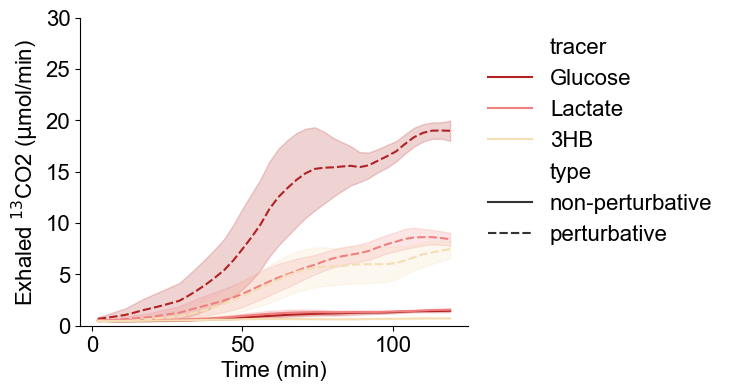

In [41]:
# Make time line plot 
f, ax = plt.subplots(1, 1, figsize=(5, 4))  


sns.lineplot(data=data, x='Time_min', y='13CO2_flux_5min', hue='tracer', style='type', palette=colors_met[:3],  errorbar='se')

sns.despine()

plt.ylim(0,30)

plt.ylabel('Exhaled $^{13}$CO2 ($\mathrm{\mu}$mol/min) ')
plt.xlabel('Time (min)')

plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.savefig('./output/13CO2_flux_time.svg', bbox_inches='tight')

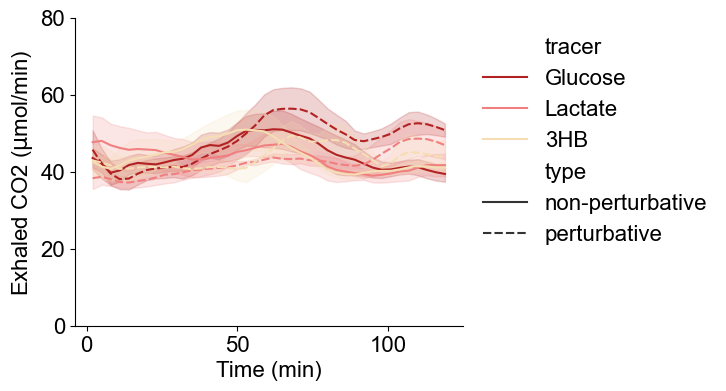

In [42]:
# Make time line plot 
f, ax = plt.subplots(1, 1, figsize=(5, 4))  

sns.lineplot(data=data, x='Time_min', y='vco2_umol_5min', hue='tracer', style='type',palette=colors_met[:3],  errorbar='se')
sns.despine()

plt.ylim(0,80)

plt.ylabel('Exhaled CO2 ($\mathrm{\mu}$mol/min) ')
plt.xlabel('Time (min)')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False,)

plt.savefig('./output/CO2_flux_time.svg', bbox_inches='tight')

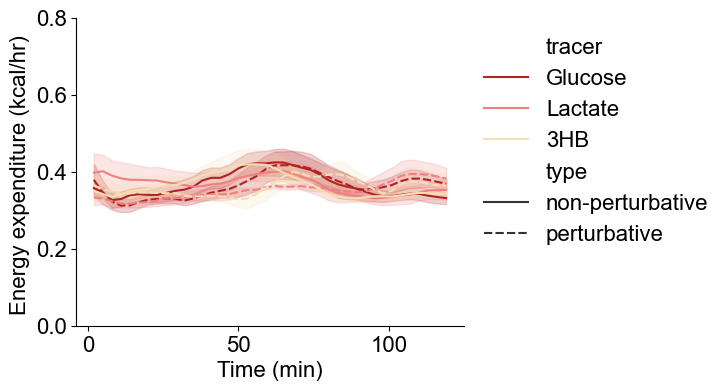

In [43]:
# Make time line plot 
f, ax = plt.subplots(1, 1, figsize=(5, 4))  

sns.lineplot(data=data, x='Time_min', y='energy_expenditure_5min', hue='tracer', style='type',palette=colors_met[:3],  errorbar='se')
sns.despine()

plt.ylim(0,0.8)

plt.ylabel('Energy expenditure (kcal/hr) ')
plt.xlabel('Time (min)')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.savefig('./output/energy_expenditure_time.svg', bbox_inches='tight')

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/2610135029.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=data_average, x='13CO2_flux', y='energy_expenditure', hue='tracer',palette=colors_met, s=100, ax=ax)


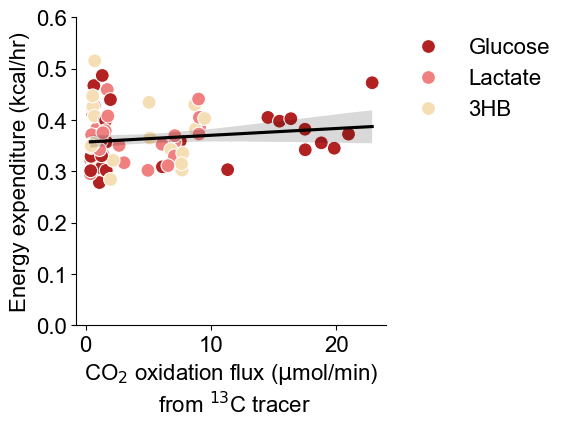

In [ ]:
import seaborn as sns

f, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(data=data_average, x='13CO2_flux', y='energy_expenditure', hue='tracer',palette=colors_met, s=100, ax=ax)

# Add a regression line per tracer
sns.regplot( data=data_average, x="13CO2_flux", y="energy_expenditure", ci=95, marker='none', line_kws=dict(color="black"), ax=ax,)

sns.despine()
plt.xlabel('$^{13}$CO$_2$ flux ($\mathrm{\mu}$mol/min)')
plt.ylabel('Energy expenditure (kcal/hr)')

plt.ylim(0, 0.6)

plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.savefig('./output/EnergyExpenditure_vs_C13CO2_flux.svg',  bbox_inches='tight')


/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_58809/2036836631.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=data_average, x='13CO2_flux', y='vco2_umol', hue='tracer',palette=colors_met, s=100, ax=ax)


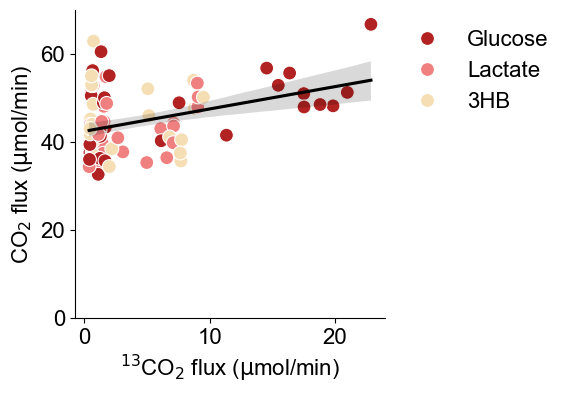

In [45]:
import seaborn as sns

f, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(data=data_average, x='13CO2_flux', y='vco2_umol', hue='tracer',palette=colors_met, s=100, ax=ax)

# Add a regression line per tracer
sns.regplot( data=data_average, x="13CO2_flux", y="vco2_umol", ci=95, marker='none', line_kws=dict(color="black"), ax=ax,)

sns.despine()
plt.xlabel('$^{13}$CO$_2$ flux ($\mathrm{\mu}$mol/min)')
plt.ylabel('CO$_2$ flux ($\mathrm{\mu}$mol/min)')


plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.ylim(0, 70)

plt.savefig('./output/CO2_flux_vs_C13CO2_flux.svg',  bbox_inches='tight')


In [46]:
data_average

,type,Time_min_30bin,cage,tracer,energy_expenditure,si13co2,vco2,vo2,CO2_enrichment,13CO2_flux,vco2_umol,Time_min
0,non-perturbative,0,Cage1,Glucose,0.355901,216.918662,0.987579,1.227966,0.013485,0.592291,44.088360,15.5
1,non-perturbative,0,Cage10,Lactate,0.425758,-17.696700,1.146561,1.478780,0.010918,0.558484,51.185745,15.5
2,non-perturbative,0,Cage11,3HB,0.370291,-18.167053,1.010892,1.282283,0.010913,0.492260,45.129097,15.5
3,non-perturbative,0,Cage12,Glucose,0.413708,-17.685872,1.129050,1.432736,0.010918,0.550184,50.404014,15.5
4,non-perturbative,0,Cage13,Lactate,0.321223,-18.850110,0.845623,1.121149,0.010905,0.411776,37.751029,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...
91,perturbative,90,Cage3,3HB,0.314673,22129.318000,0.837523,1.095726,0.206163,7.651744,37.389400,105.5
92,perturbative,90,Cage4,Glucose,0.402480,37288.703000,1.244697,1.352796,0.299449,16.366978,55.566836,105.5
93,perturbative,90,Cage5,Lactate,0.405012,19033.953000,1.122815,1.397708,0.183583,9.073240,50.125654,105.5
94,perturbative,90,Cage6,3HB,0.402864,19793.440000,1.121630,1.388958,0.189352,9.495780,50.072771,105.5


In [47]:
# Get cage data at Time_min_30bin == 90 min
data_cage_average = data_average[data_average['Time_min_30bin'] == 90]


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Lactate_non-perturbative vs. Lactate_perturbative: Welch's t-test independent samples, P_val:3.169e-01 t=-1.096e+00
Glucose_non-perturbative vs. Glucose_perturbative: Welch's t-test independent samples, P_val:5.650e-03 t=-4.261e+00
3HB_non-perturbative vs. 3HB_perturbative: Welch's t-test independent samples, P_val:5.845e-01 t=-5.981e-01


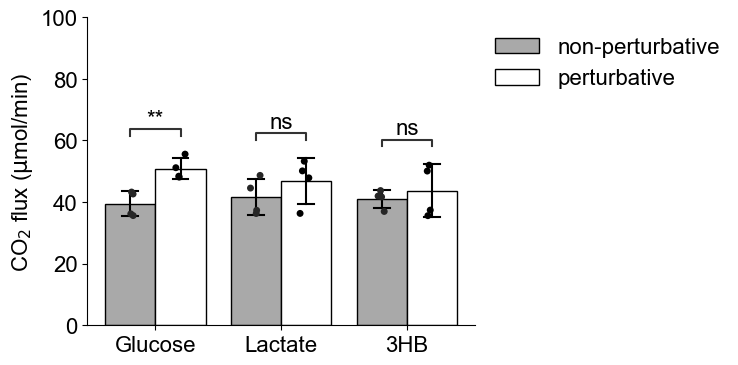

In [48]:
# e) Total CO2 lux (VCO2)

f, ax = plt.subplots(1, 1, figsize=(5, 4))

hue_order = ['non-perturbative', 'perturbative']
order = ['Glucose', 'Lactate', '3HB']

pairs = [ (('Glucose','non-perturbative') , ('Glucose','perturbative')),
            (('Lactate','non-perturbative') , ('Lactate','perturbative')),
            (('3HB','non-perturbative') , ('3HB','perturbative'))]

data_average['VCO2'] = data_average['vco2'] / (22.4 * 1000) * 1e6 

data_cage_average = data_average[data_average['Time_min_30bin'] == 90]

sns.barplot(data=data_cage_average, x='tracer', y='VCO2', hue='type', palette=colors, errorbar='sd',capsize=0.25, 
             edgecolor='black', err_kws={'color': 'black','linewidth': 1.5}, order=order)
sns.stripplot(data=data_cage_average, x='tracer', y='VCO2', hue='type', dodge=True, size=5,
               alpha=1.0, palette='dark:black', legend=False, order=order)

sns.despine()           
plt.ylabel(r'CO$_2$ flux ($\mathrm{\mu}$mol/min)')   
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylim(0,100)

# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)


annotator = Annotator(ax, pairs, data=data_cage_average,
                        x='tracer', y='VCO2', hue='type', order=order, 
                        hue_order=hue_order)

annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/CO2_flux.svg', bbox_inches='tight')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Lactate_non-perturbative vs. Lactate_perturbative: Welch's t-test independent samples, P_val:4.860e-01 t=-7.427e-01
Glucose_non-perturbative vs. Glucose_perturbative: Welch's t-test independent samples, P_val:2.555e-01 t=-1.264e+00
3HB_non-perturbative vs. 3HB_perturbative: Welch's t-test independent samples, P_val:6.011e-01 t=-5.673e-01


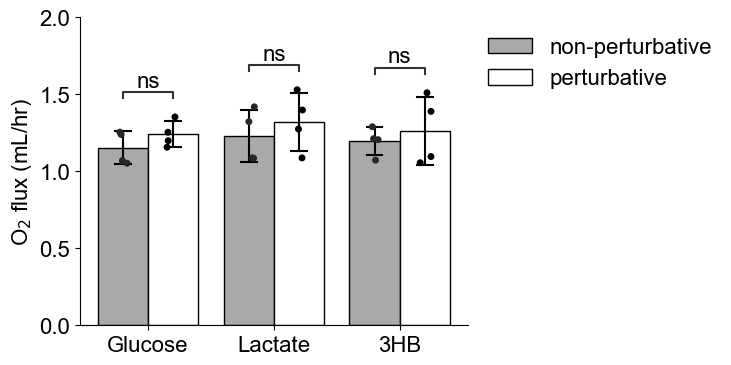

In [49]:
# e) Total O2 flux (VO2)

f, ax = plt.subplots(1, 1, figsize=(5, 4))

hue_order = ['non-perturbative', 'perturbative']
order = ['Glucose', 'Lactate', '3HB']

pairs = [ (('Glucose','non-perturbative') , ('Glucose','perturbative')),
            (('Lactate','non-perturbative') , ('Lactate','perturbative')),
            (('3HB','non-perturbative') , ('3HB','perturbative'))]

data_average['VO2'] = data_average['vo2']

data_cage_average = data_average[data_average['Time_min_30bin'] == 90]

sns.barplot(data=data_cage_average, x='tracer', y='VO2', hue='type', palette=colors, errorbar='sd',capsize=0.25, 
             edgecolor='black', err_kws={'color': 'black','linewidth': 1.5}, order=order)
sns.stripplot(data=data_cage_average, x='tracer', y='VO2', hue='type', dodge=True, size=5,
               alpha=1.0, palette='dark:black', legend=False, order=order)

sns.despine()           
plt.ylabel(r'O$_2$ flux (mL/hr)')   
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylim(0,2)

# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)


annotator = Annotator(ax, pairs, data=data_cage_average,
                        x='tracer', y='VO2', hue='type', order=order, 
                        hue_order=hue_order)

annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/O2_flux.svg', bbox_inches='tight')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Lactate_non-perturbative vs. Lactate_perturbative: Welch's t-test independent samples, P_val:4.475e-01 t=-8.134e-01
Glucose_non-perturbative vs. Glucose_perturbative: Welch's t-test independent samples, P_val:1.150e-01 t=-1.858e+00
3HB_non-perturbative vs. 3HB_perturbative: Welch's t-test independent samples, P_val:5.974e-01 t=-5.740e-01


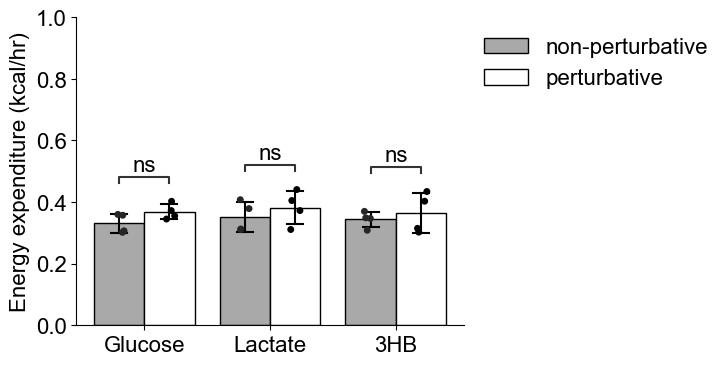

In [50]:
# Energy expenditure

f, ax = plt.subplots(1, 1, figsize=(5, 4))

hue_order = ['non-perturbative', 'perturbative']
order = ['Glucose', 'Lactate', '3HB']

pairs = [ (('Glucose','non-perturbative') , ('Glucose','perturbative')),
            (('Lactate','non-perturbative') , ('Lactate','perturbative')),
            (('3HB','non-perturbative') , ('3HB','perturbative'))]


sns.barplot(data=data_cage_average, x='tracer', y='energy_expenditure', hue='type', palette=colors, errorbar='sd',capsize=0.25, 
             edgecolor='black', err_kws={'color': 'black','linewidth': 1.5}, order=order)
sns.stripplot(data=data_cage_average, x='tracer', y='energy_expenditure', hue='type', dodge=True, size=5,
               alpha=1.0, palette='dark:black', legend=False, order=order)

sns.despine()           
plt.ylabel(r'Energy expenditure (kcal/hr)')   
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylim(0,1.0)

# Legend outside plot no title
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)


annotator = Annotator(ax, pairs, data=data_cage_average,
                        x='tracer', y='energy_expenditure', hue='type', order=order, 
                        hue_order=hue_order)

annotator.configure(test='t-test_welch', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./output/energy_expenditure.svg', bbox_inches='tight')


In [51]:
data_cage_average.to_csv('./output/gas_data_cage_average.csv', index=False)